# Building a Custom CNN for Cat vs. Dog Classification (Regularized using Early Stopping and Dropout Layers to prevent overfitting)

### Our last model was clearly overfit now lets solve the problem

### Custom CNN for Cat vs. Dog Classification: Key Steps

1.  **Data Preprocessing:** Use `ImageDataGenerator` to load images from directories. Apply **data augmentation** (flips, zooms, rotations) to the training set and **rescale** all images (dividing by 255.0).

2.  **Build CNN Architecture:**
    * Initialize a `Sequential` model.
    * Add `Conv2D` and `MaxPool2D` layers (usually in pairs) to extract features.
    * Use a `Flatten` layer to convert the 2D feature maps into a 1D vector.
    * Add `Dense` layers (with `relu` activation) to act as the classifier head.
    * Add the final `Dense` output layer with `units=1` and `activation='sigmoid'` for binary classification.

3.  **Compile the Model:** Use `ann.compile()` with `optimizer='adam'`, `loss='binary_crossentropy'`, and `metrics=['accuracy']`.

4.  **Train the Model:** Call `ann.fit()` on the training data generator, providing the validation data generator to the `validation_data` argument.

5.  **Evaluate and Predict:** Use `ann.evaluate()` to check performance and `ann.predict()` to make predictions on new, unseen images (remembering to rescale them first).

## Importing the Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
tf.__version__

'2.20.0'

## Preprocessing the Training Set and Test Set

**We apply rescaling from 0-255 to 0-1, shear transformation(tilt), zoom transformation and horizontal flip to prevent overfitting**

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,         
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True    
)
test_datagen = ImageDataGenerator(rescale=1./255) #We only apply rescale to our test set

## Importing the training and test set

In [3]:
training_set=train_datagen.flow_from_directory('dataset/training_set',target_size=(64,64),batch_size=32,class_mode='binary')
test_set=test_datagen.flow_from_directory('dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Visualizing couple of images

{'cats': 0, 'dogs': 1}


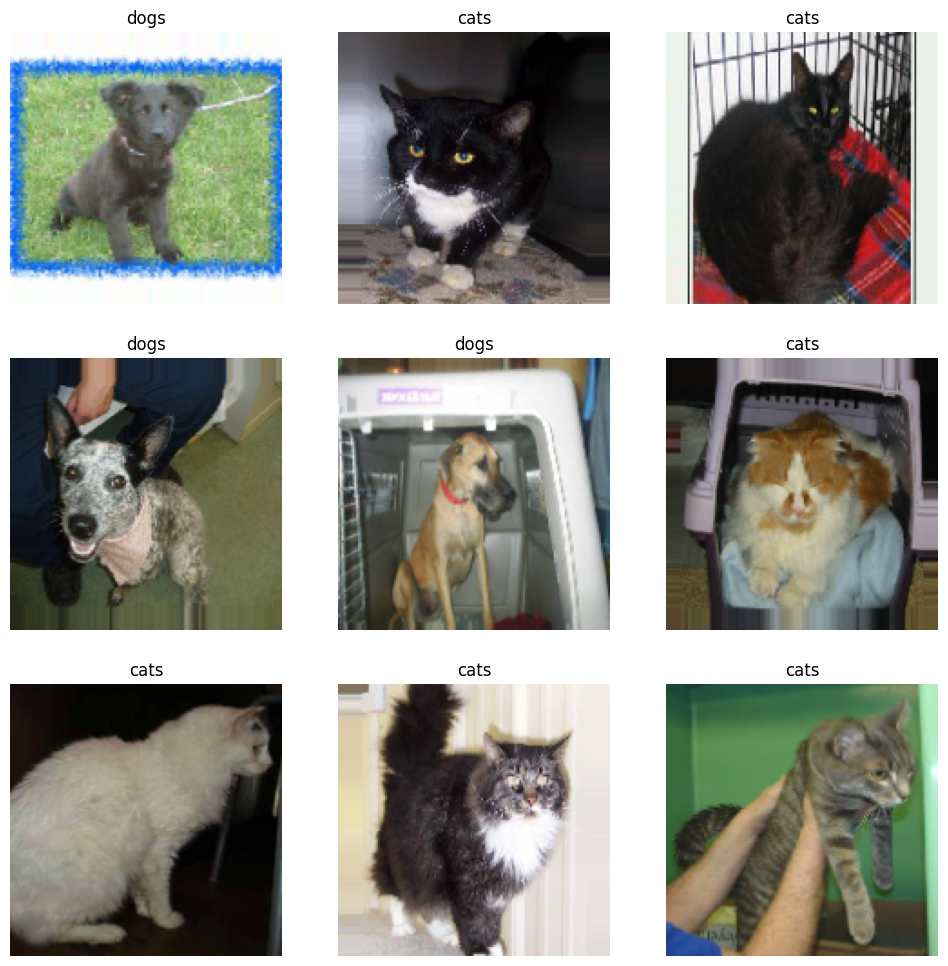

In [20]:
images,labels=next(training_set)
print(training_set.class_indices)
class_names=list(training_set.class_indices.keys())

plt.figure(figsize=(12,12))
for i in range(9):
    grid=plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    label_index=int(labels[i])
    plt.title(class_names[label_index])
    plt.axis("off")
plt.show()

## Building the CNN and adding dropout layers

In [4]:
cnn=tf.keras.models.Sequential()

### 1.Convolution

**We use the RELU(rectifier) function to increase the non linearity in the dataset by removing all negative values generated from the Conv2D function**

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

C:\Users\anand\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 2.Applying Max Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

### 3.Adding the second convoluted layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### 4.Flattening 

In [8]:
cnn.add(tf.keras.layers.Flatten())

### 5.Full Connection Changing the neurons to 64 from 128 to prevent overfitting

In [9]:
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))

### 6.Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Training the CNN and implementing early stopping

In [3]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

NameError: name 'cnn' is not defined

In [12]:
cnn.fit(x=training_set,validation_data=test_set,epochs=30,callbacks=[early_stop])

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 105ms/step - accuracy: 0.5339 - loss: 0.6895 - val_accuracy: 0.5730 - val_loss: 0.6568
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 105ms/step - accuracy: 0.6332 - loss: 0.6384 - val_accuracy: 0.7085 - val_loss: 0.5812
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 105ms/step - accuracy: 0.6809 - loss: 0.5906 - val_accuracy: 0.7080 - val_loss: 0.5703
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.7080 - loss: 0.5655 - val_accuracy: 0.7320 - val_loss: 0.5464
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 103ms/step - accuracy: 0.7255 - loss: 0.5383 - val_accuracy: 0.7630 - val_loss: 0.5107
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.7474 - loss: 0.5155 - val_accuracy: 0.7530 - val_loss: 0.5040
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.7580 - loss: 0.4985 - val_accuracy: 0.7705 - val_loss: 0.4859
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 104ms/step - accuracy: 0.7648 - loss: 0

## We see that the model has achieved 80% accuracy in the training set and  78% accuracy in the test set. The test accuracy remains the same while the model is not overfit which is better than the first result.

# Making a single Prediction

### These are the images going to be predicted

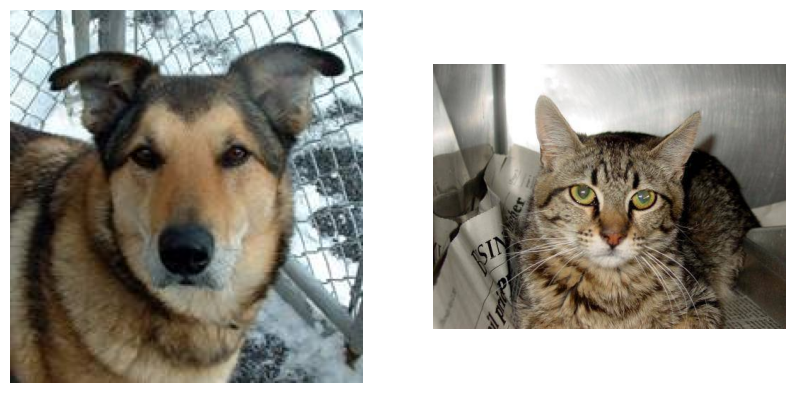

In [13]:
plt.figure(figsize=(10,6))
original_img1=plt.imread('dataset/single_prediction/cat_or_dog_1.jpg')
original_img2=plt.imread('dataset/single_prediction/cat_or_dog_2.jpg')
plt.subplot(1,2,1)
plt.imshow(original_img1)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(original_img2)
plt.axis('off')
plt.show()

In [16]:
img1=image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))
img2=image.load_img('dataset/single_prediction/cat_or_dog_2.jpg',target_size=(64,64))
img_array1=image.img_to_array(img1)
img_array2=image.img_to_array(img2)
img_array1=img_array1/255.0
img_batch1=np.expand_dims(img_array1,axis=0)
img_array2=img_array2/255.0
img_batch2=np.expand_dims(img_array2,axis=0)
pred1=cnn.predict(img_batch1)
pred2=cnn.predict(img_batch2)

def get_readable_prediction(prediction_prob):
    prob_dog=prediction_prob
    prob_cat=1-prediction_prob
    if(prob_dog>prob_cat):
        return f"Prediction: Dog ({prob_dog:.3%}) | Cat ({prob_cat:.3%})"
    else:
        return f"Prediction: Cat ({prob_cat:.3%}) | Dog ({prob_dog:.3%})"
print(f"Image 1 Result: {get_readable_prediction(pred1[0][0])}")
print(f"Image 2 Result: {get_readable_prediction(pred2[0][0])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Image 1 Result: Prediction: Dog (79.032%) | Cat (20.968%)
Image 2 Result: Prediction: Cat (94.175%) | Dog (5.825%)


## Even though the accuracy of the first model was higher it was clearly overfit. After adding EarlyStopping, Drop out Layers and Halving the amount of neurons(Nodes) in the hidden layer we have achieved more or less the same accuracy but a more reliable model which performs better with new Unseen data